# Credit Card Customer Segmentation

The purpose of this analysis is the segmentation of customers based on their credit card details provided in the following kaggle dataset: https://www.kaggle.com/arjunbhasin2013/ccdata
This analysis will help in developing the focused marketing strategy on a particular segment of customers.

# Dataset Description

This kaggle dataset contains information about the usage behavior of about 9000 active credit card holders for a duration of 6 months. The columns in the given dataset are as follows:

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance taken by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

# Project Outline

- Data Exploration and Cleansing: 
 - Check for null values and fill null values
 - Data scaling and normalisation
 - Check for correlation between attributes
- Determine Optimum No. of Clusters: 
 - Elbow method 
 - Silhouette method
- Identifying Customer Segments:
 - Understand customer behaviour based on data distribution in each cluster
- Dimensionality Reduction:
 - To visualize all the clusters in 2D space reduce data to 2 dimensions using PCA

# Importing Required Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
import seaborn as sns

# Data Exploration

In [2]:
df = pd.read_csv('CC_GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
#check missing values in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
#fill missing values with mean
df = df.fillna(df.mean())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
#Customer ID column is just for customer identification. We can drop this column for our analysis
df.drop('CUST_ID',axis = 1,inplace = True)

#scaling columns of dataframe to mean = 0 and std. dev = 1
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df)

In [10]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = df.columns

In [11]:
scaled_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.209548e-14,-9.278518e-16,3.916048e-15,2.275424e-15,5.693056e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.729495e-16,-7.151821e-16,-3.570713e-15,-5.142466e-15,-2.421651e-16,1.863190e-17,-2.201566e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221536e+00,-5.986883e-01,-3.708230e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.955261e-01,-4.662913e-01,-2.975162e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107426e-01,-3.026846e-01,-2.268130e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.512163e-01,5.802976e-02,-5.366135e-16,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.010083e+00,1.692228e+01,3.241509e+01,2.893453e+00,3.606795e-01


In [12]:
#L2 normalization of each row of dataframe
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)
normalized_df.columns = df.columns
normalized_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000
mean,-0.036517,0.020765,-0.042853,-0.035385,-0.036301,-0.039530,-0.023762,-0.032069,-0.020423,-0.032526,-0.036470,-0.043200,-0.048996,-0.048645,-2.857930e-02,-0.034810,0.032620
std,0.244663,0.295141,0.156043,0.152297,0.184492,0.205965,0.324395,0.281654,0.324835,0.269656,0.203612,0.196881,0.276724,0.176655,1.422041e-01,0.275404,0.245795
min,-0.483286,-0.909587,-0.298688,-0.268728,-0.311007,-0.333097,-0.580187,-0.488511,-0.563468,-0.481928,-0.339723,-0.315757,-0.613080,-0.405245,-2.661731e-01,-0.433600,-0.933146
25%,-0.206007,0.011609,-0.152266,-0.130623,-0.162728,-0.170306,-0.314059,-0.233677,-0.302316,-0.229799,-0.166016,-0.183131,-0.261668,-0.165724,-1.026431e-01,-0.210105,0.073358
50%,-0.110904,0.135002,-0.089667,-0.086978,-0.095260,-0.115147,0.006431,-0.143900,-0.125565,-0.124176,-0.109130,-0.095093,-0.112031,-0.099205,-6.813109e-02,-0.134432,0.114041
75%,0.074168,0.207875,0.015296,-0.002794,0.019878,0.022142,0.277270,0.087703,0.271934,0.106570,0.036543,0.028962,0.144751,0.016484,-1.324866e-16,-0.013585,0.151449
max,0.854700,0.427439,0.603604,0.749526,0.901891,0.865599,0.597942,0.820098,0.684727,0.881966,0.968073,0.961134,0.898725,0.920825,9.918370e-01,0.875101,0.324544


# Finding Optimum Number Of Clusters

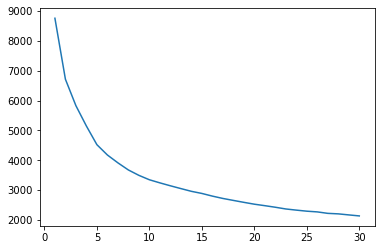

In [13]:
n_clusters=np.arange(1,31,1)
cost=[]
for i in n_clusters:
    kmean= KMeans(i)
    kmean.fit(normalized_df)
    cost.append(kmean.inertia_)
plt.plot(n_clusters,cost)

In [14]:
#elbow criterion: elbow at n_clusters = 6, so optimum no. of clusters are 6

In [15]:
n_clusters = np.arange(2,11,1)

In [16]:
#Let's also check with Silhouette Coefficient Method
silhouette_scores = []
for i in n_clusters:
    cluster_labels = KMeans(n_clusters = i).fit_predict(normalized_df)
    silhouette_scores.append(silhouette_score(normalized_df, cluster_labels))

Text(0, 0.5, 'Silhouette Score')

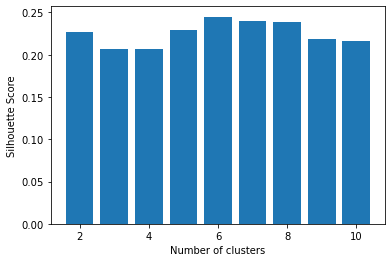

In [17]:
plt.bar(n_clusters,silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10)

In [18]:
#silhouette_score is highest for n_clusters = 6, so optimum no. of clusters are 6

In [19]:
#both elbow method and silhouette score method gives the same optimum number of clusters

In [20]:
#Clustering with optimum number of clusters i.e. 6
kmean= KMeans(6)
kmean.fit(normalized_df)
labels=kmean.labels_

In [21]:
labels_df = pd.DataFrame({'cluster':labels})

In [22]:
#adding labels to the dataframe
df_new = pd.concat([normalized_df,labels_df],axis = 1)

In [23]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704,1
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796,3
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187,5
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-2.250182e-16,-0.220379,0.151244,2
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400,1


<AxesSubplot:>

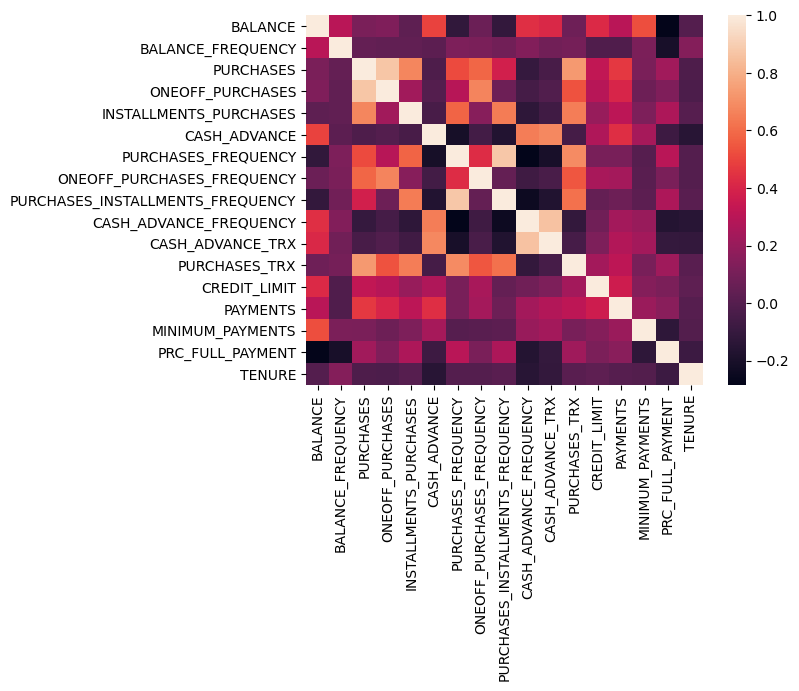

In [48]:
# Check correlation between attributes
matplotlib.rcdefaults()
sns.heatmap(normalized_df.corr())

We can observe that following attributes are highly correlated:
- CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX
- CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX
- PURCHASES, ONEOFF_PURCHASES, PURCHASES_FREQUENCY and ONEOFF_PURCHASES_FREQUENCY

# Identifying Customer Segments

In [26]:
ax = []
for i in range(108):
    ax.append('ax'+str(i+1))

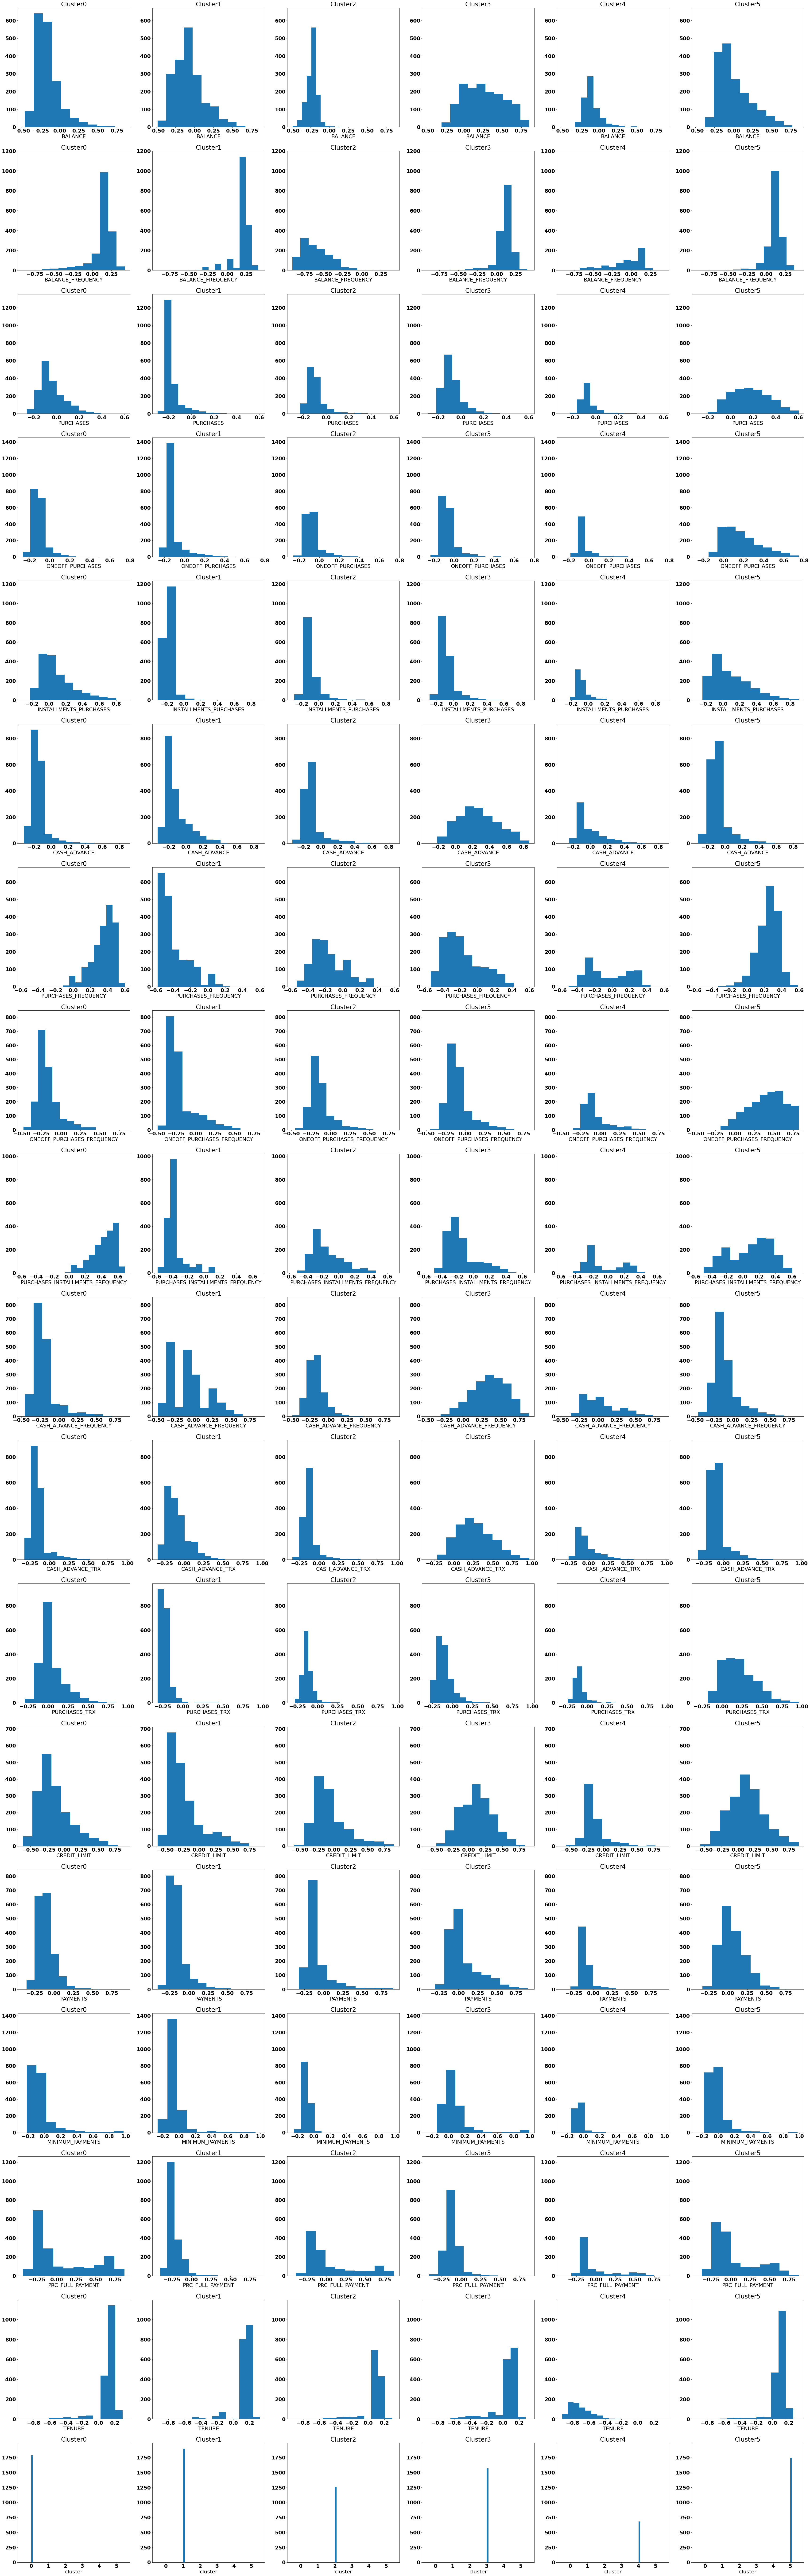

In [27]:
#Cluster wise distribution of each customer behavior variable
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
plt.figure(figsize=(60,200))
for i,col in enumerate(df_new.columns):
    for j in range(6):
        if j > 0:
            ax[i*6+j] = plt.subplot(18,6,i*6+j+1,sharey = ax[i*6+j-1],sharex = ax[i*6+j-1])
        else:
            ax[i*6+j] = plt.subplot(18,6,i*6+j+1)
        ax[i*6+j].hist(df_new[df_new['cluster']==j][col])
        ax[i*6+j].set_xlabel(col)
        ax[i*6+j].set_title('Cluster' + str(j))

# From above distribution users can be clustered into following categories
- Cluster 0: Users who freqently purchases in installments
- Cluster 1: Users with due payments (who pay small percentage of full payment)
- Cluster 2: Users with low account balance and balance update frequency
- Cluster 3: Users who take more cash in advance and frequently pay cash in advance
- Cluster 4: Users with low credit limit and small tenure of credit card service
- Cluster 5: Users who frequently make expensive purchases

In [35]:
#Dimensionality reduction using PCA to visualize all the clusters in 2D space
pca = PCA(2)
pca.fit(normalized_df)
df_PCA = pca.transform(normalized_df)
df_PCA.shape

(8950, 2)

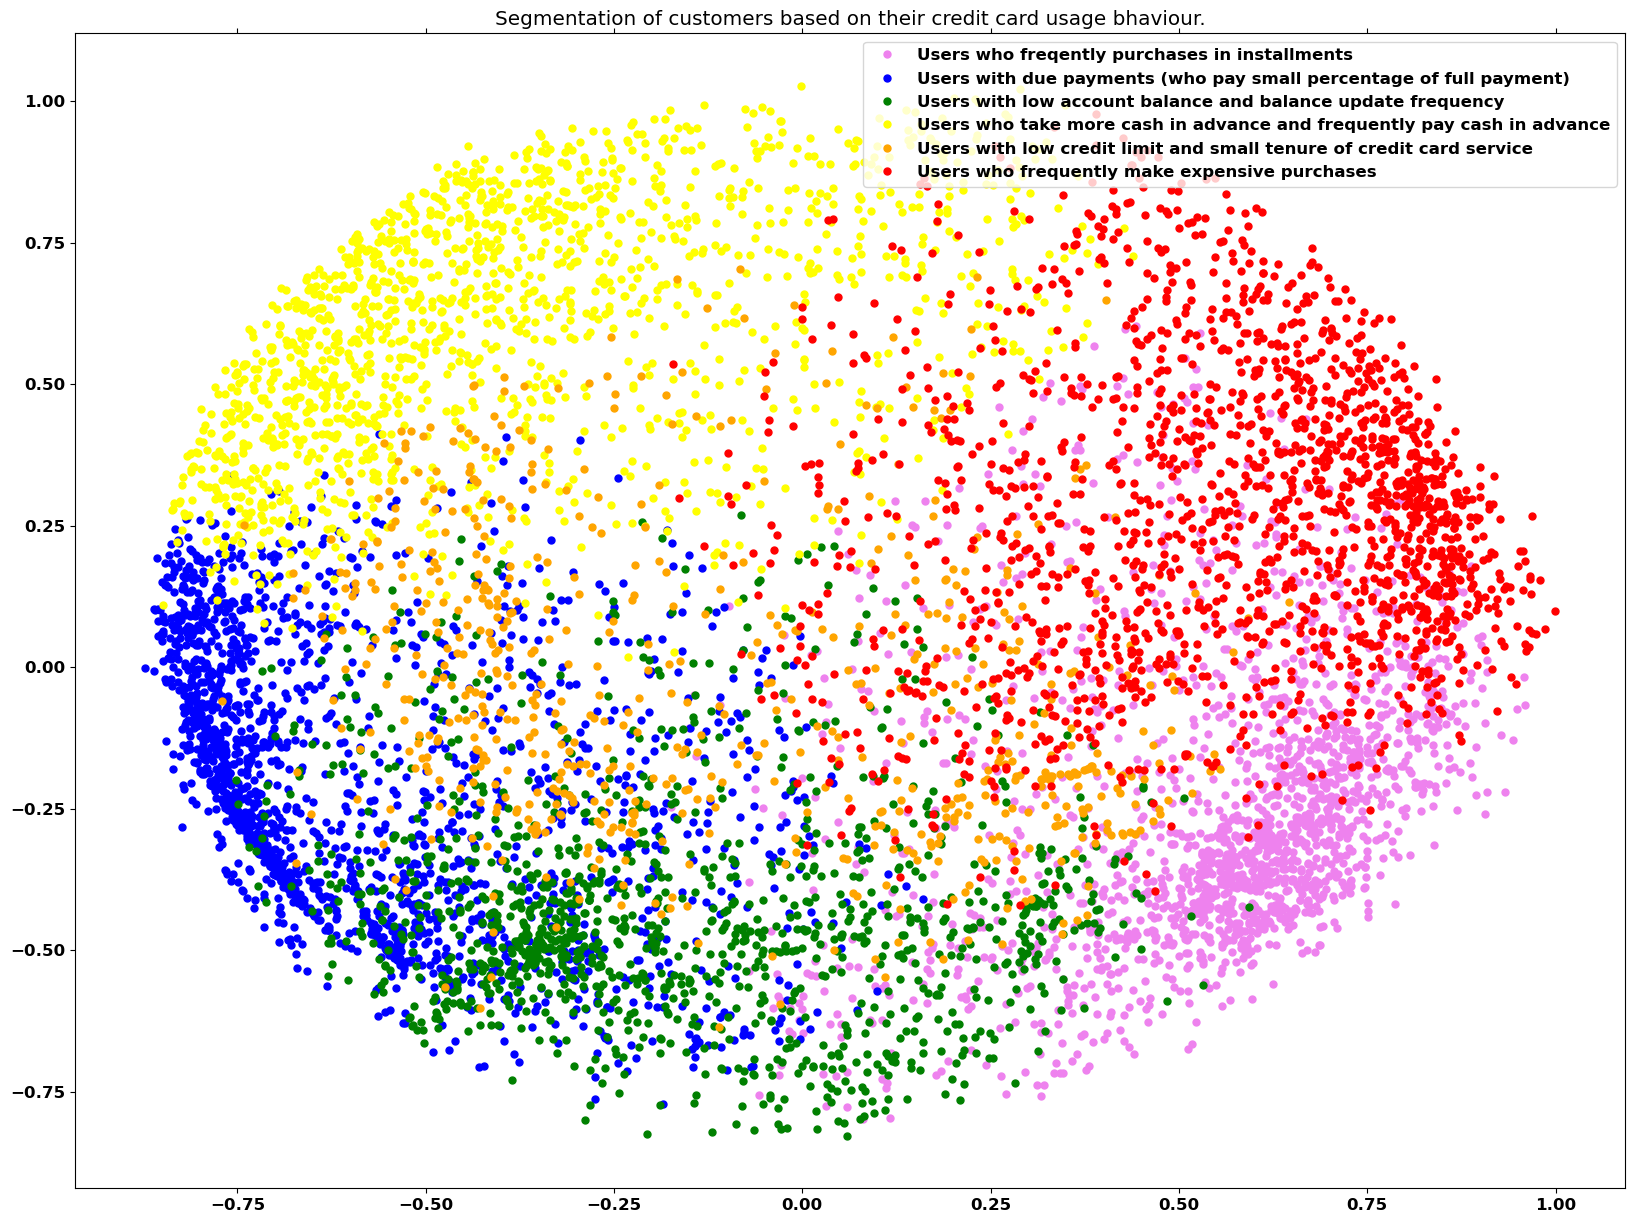

In [44]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)
#matplotlib.rcdefaults()
x, y = df_PCA[:, 0], df_PCA[:, 1]
colors = {0: 'violet',1: 'blue',2: 'green', 3: 'yellow', 4: 'orange',  5:'red'}
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
segments = df.groupby('label')
fig, ax = plt.subplots(figsize=(20, 15)) 
legends = {0: 'Users who freqently purchases in installments',
           1: 'Users with due payments (who pay small percentage of full payment)',
           2: 'Users with low account balance and balance update frequency',
           3: 'Users who take more cash in advance and frequently pay cash in advance',
           4: 'Users with low credit limit and small tenure of credit card service',
           5: 'Users who frequently make expensive purchases'}

for label, segment in segments:
    ax.plot(segment.x, segment.y, marker='o', linestyle='', ms=5,color=colors[label],label=legends[label])
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(loc = 1)
ax.set_title("Segmentation of customers based on their credit card usage bhaviour.")
plt.show()

Based on the identified user clusters, focused marketing strategies can be developed to target different segments of users.